In [9]:
import numpy as np
from matplotlib import pyplot as plt 

In [55]:
class GRBFTrajectory(object):
    def __init__(self, n_dims, sigma, steps_per_basis, max_basis):
        self.n_dims = n_dims
        self.sigma = sigma
        self.alpha = - 1. / (2. * self.sigma ** 2.)
        self.steps_per_basis = steps_per_basis
        self.max_basis = max_basis
        self.precomputed_gaussian = np.zeros(2 * self.max_basis * self.steps_per_basis)
        for i in range(2 * self.max_basis * self.steps_per_basis):
            self.precomputed_gaussian[i] = self.gaussian(self.max_basis * self.steps_per_basis, i)
       
    def gaussian(self, center, t):
        return np.exp(self.alpha * (center - t) ** 2.)
   
    def trajectory(self, weights):
        n_basis = len(weights)//self.n_dims
        weights = np.reshape(weights, (n_basis, self.n_dims)).T
        steps = self.steps_per_basis * n_basis
        traj = np.zeros((steps, self.n_dims))
        for step in range(steps):
            g = self.precomputed_gaussian[self.max_basis * self.steps_per_basis + self.steps_per_basis - 1 - step::self.steps_per_basis][:n_basis]
            traj[step] = np.dot(weights, g)
        return np.clip(traj, -1., 1.)

In [99]:
traj = GRBFTrajectory(10, 10, 40, 10)

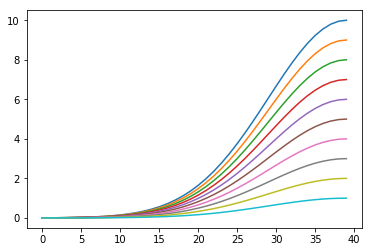

In [97]:
plt.plot(traj.trajectory([10, 9, 8, 7,6,5,4,3,2,1]))

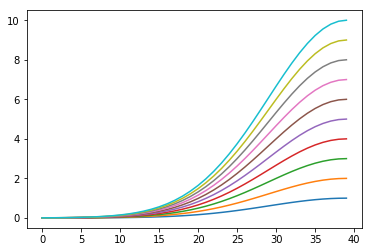

In [100]:
plt.plot(traj.trajectory([1,2,3,4,5,6,7,8,9, 10]))

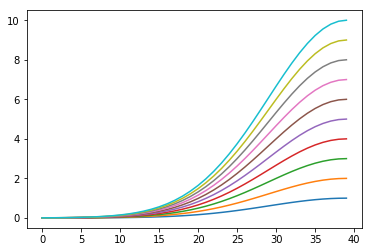

In [98]:
plt.plot(traj.trajectory([1,2,3,4,5,6,7,8,9, 10]))